# Home Assignment 3 in Deep Learning and Clustering [20 points]
**Goal:** Try out image classification using fully-connected and convolutional neural networks, and cluster representations of state-of-the-art image classifiers. <br />
**Grader:** Lovisa Hagström <br />
**Due Date:** 10/3 <br />
**Submitted by: Himanshu Sahni, 9812075498, sahni@chalmers.se** <br />
**Submitted by: Alvaro Vazquez, 9712196311, alvarov@chalmers.se** <br />


---

# Read this before starting

## General guielines 
* Answer all fields marked with 📝. This includes
    * your name, personal number and email address above, and
    * all later fields marked with "📝 Your answer here:".
* Feel free to add more cells if needed.
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook does not have to be run. The code in the notebook should reproduce the plots/results if we choose to run it. 
    * Do NOT hand in an assignment that isn't runnable!
* Do not modify the provided code unless told to do so.
* All tables and other additional information should be included in this notebook.
* Before submitting, make sure that your code can run on another computer, i.e. that all plots can show on another computer including all your writing. It is also good to check if your code can run on Google Colab.
* **Submit your solutions as notebook file (`.ipynb`) and in HTML format (`.html`).** To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.


> **Note:** Training neural networks is computationally demanding and may take time if you run it on your laptop. Running the code in Google Colab will likely be faster and you can even get access to a GPU.

> **Note:** To enable GPU hardware accelartion in Google Colab, click the `Change runtime type` field in the `runtime` drop-down menu, then choose `GPU` under hardware acceleration.

> **Note:** If you are using Google Colab and you would like to export the notebook to HTML format, you need to first download it through `File` $\rightarrow$ `Download as` $\rightarrow$ `ipynb` and then use the standard tool for Jupyter Notebook conversion, nbconvert: jupyter nbconvert --to html notebook.ipynb (you need to run it from the command line). For more info (and example), see [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab).



## Required software

For this assignment you will need to install the following Python packages:

- `pytorch`: Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/) (make sure that you install it together with CUDA to enable GPU acceleration)
- `torchvision`: Typically installed with pytorch
- `numpy`: The fundamental package for scientific computing with Python (so fundamental there is a [Nature review](https://www.nature.com/articles/s41586-020-2649-2) on it) 
- `pandas`: Data analysis and manipulation tool
- `matplotlib`: Visualization with Python
- `pillow`: Image library to handle PIL images
- `catsndogs`: The data sets we will be working with.

> **Note:** In Google Colab you can install packages using   `!pip  <package_name>`

> **Note:** In Google Colab several of these packages are preinstalled but it is a good habit to check if all required packages are installed beforehand and the installed versions of packages. Use `!pip list` to list packages installed by pip on Google Colab.

___

## Deep Learning
## Exercise 1: Backpropagation by hand [2 points]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of an input layer $\mathbf{y}_0 = \mathbf{x}$ with 3 features,  one hidden layer
with activations $\mathbf{y}_1$ and a two-dimensional output layer with activations $\mathbf{y}_2 = \hat{\mathbf{y}}$.

![Neural network illustration.](https://raw.githubusercontent.com/hampusgs/machine_learning/main/2022/simpleNN.png)

The activations of a layer $k$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}^{(k)}$ to the input activations $\mathbf{y}_{k - 1}$ producing the intermediate values $\mathbf{z}_k$:

$$
z_{k , i} = \sum_j  y_{k - 1,i} w^{(k)}_{i, j}\\
$$

This is followed by the element-wise application of the layers'
activation function $g_k$ to the intermediate values $\mathbf{z}_k$:

$$
y_{k,j} = g_{k} (z_{k,j})
$$

> **Note:** Here we use the same notation as in the lecture slides, but several different notations exist.


### a)

Given the derivatives of a loss term $E$ with respect to the activations of the output neurons 
$\frac{dE}{dy_{2,j}}$ (and the variables/functions in the description above), derive expressions for the derivatives of the loss term with respect to the weights
$w^{(k)}_{i,j}$ and activations $y_{k,j}$ of the remaining layers of the network. Simplify as much as possible. Please show all the calculation details.

Also, to simplify the results, you are encouraged to reuse derivatives you have already computed in the expressions for the  downstream derivatives.

$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \: ? \\
\frac{dE}{dy_{1,j}} = \: ? \\
\frac{dE}{dw^{(1)}_{i, j}} = \: ? \\
\frac{dE}{dy_{0,j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the loss function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

#### 📝 Your answer here: 
<!-- 
$$
\begin{align}
\frac{dE}{dw^{(2)}_{i, j}} = \frac{dE}{dy_{2,j}}\frac{dy_{2,j}}{dw^{(2)}} \\
\frac{dE}{dy_{1,j}} = \frac{dE}{dw_{i,j}^{(2)}}\frac{dw_{i,j}^{(2)}}{dy_{1,j}} \\
\frac{dE}{dw^{(1)}_{i, j}} =  \frac{dE}{dy_{1,j}}\frac{dy_{1,j}}{dw_{i,j}^{(1)}} \\
\frac{dE}{dy_{0,j}} = \frac{dE}{dw_{i,j}^{(1)}}\frac{dw_{i,j}^{(1)}}{dy_{0,j}} \\
\end{align}
$$ -->

$$
\begin{align}
    \frac{dE}{dw^{(2)}_{i, j}} &= 
    \frac{dE}{dy_{2,j}} \, \frac{dy_{2,j}}{dw^{(2)}_{i, j}} =   
    \frac{dE}{dy_{2,j}} \, \frac{dg_2}{dz_{2, j}} \, \frac{dz_{2, j}}{dw^{(2)}_{i, j}} = 
    \frac{dE}{dy_{2,j}} \, \frac{dg_2}{dz_{2, j}} \, \frac{d}{dw^{(2)}{i, j}} \left[ \sum{i} y_{1,i} w_{i, j}^{(2)} \right] \Longleftrightarrow \\
    \Longleftrightarrow \frac{dE}{dw^{(2)}_{i, j}} &=
    \frac{dE}{dy_{2,j}} \, g_2^{\prime} \, \sum_{i} y_{1,i}
    \\ \\
    \frac{dE}{dy_{1,j}} &= 
    \frac{dE}{dy_{2,j}} \, \frac{dy_{2,j}}{dy_{1, j}} =  
    \frac{dE}{dy_{2,j}} \, \frac{dg_2}{dz_{2, j}} \, \frac{dz_{2, j}}{dy_{1, j}} = 
    \frac{dE}{dy_{2,j}} \, \frac{dg_2}{dz_{2, j}} \, \frac{d}{dy_{1, j}} \left[ \sum_{i} y_{1,i} w_{i, j}^{(2)} \right] \Longleftrightarrow \\
    \Longleftrightarrow \frac{dE}{dy_{1,j}} &= 
    \frac{dE}{dy_{2,j}} \, g_2^{\prime} \, \sum_{i} w_{i, i}^{(2)}
\end{align}
$$



$$
\begin{align}
    \frac{dE}{dw^{(1)}_{i, j}} &= 
    \frac{dE}{dy_{1,j}} \, \frac{dy_{1,j}}{dw^{(1)}_{i, j}} =  
    \frac{dE}{dy_{1,j}} \, \frac{dg_1}{dz_{1, j}} \, \frac{dz_{1, j}}{dw^{(1)}_{i, j}} = 
    \frac{dE}{dy_{1,j}} \, \frac{dg_1}{dz_{1, j}} \, \frac{d}{dw^{(1)}{i, j}} \left[ \sum{i} y_{0,i} w_{i, j}^{(1)} \right]=
    \frac{dE}{dy_{1,j}} \, g_1^{\prime} \, \sum_{i} y_{0,i} \Longleftrightarrow \\
    \Longleftrightarrow \frac{dE}{dw^{(1)}_{i, j}} &= 
    \frac{dE}{dy_{2,j}} \, g_1^{\prime} \, g_2^{\prime} \, \sum_{i} y_{0,i} \, \sum_{i} w_{i, i}^{(2)} 
    \\ \\
    \frac{dE}{dy_{0,j}} &= 
    \frac{dE}{dy_{1,j}} \, \frac{dy_{1,j}}{dy_{0, j}} =  
    \frac{dE}{dy_{1,j}} \, \frac{dg_1}{dz_{1, j}} \, \frac{dz_{1, j}}{dy_{0, j}} = 
    \frac{dE}{dy_{1,j}} \, \frac{dg_1}{dz_{1, j}} \, \frac{d}{dy_{0, j}} \left[ \sum_{i} y_{0,i} w_{i, j}^{(1)} \right]=
    \frac{dE}{dy_{1,j}} \, g_1^{\prime} \, \sum_{i} w_{i, i}^{(1)} \Longleftrightarrow \\
    \Longleftrightarrow \frac{dE}{dy_{0,j}} &= 
    \frac{dE}{dy_{2,j}} \, g_1^{\prime} \, g_2^{\prime} \, \sum_{i} w_{i, i}^{(1)}  \, \sum_{i} w_{i, i}^{(2)}
\end{align}    
$$

## Exercise 2: Counting parameters in networks [1 point]

### a) [0.5 point]
Imagine you apply a two layer fully connected network to a 32x32 rgb image. The hidden layer has dimension 512 and the output is of size 10. How many parameters are necessary? Include the bias parameters. Show your calculations.

### b) [0.5 point]

Apply the following network to the same image, how many parameters are needed? Include bias parameters and use no padding. Show your calculations.

* Convolutional layer with 16 5x5 filters (stride 1).

* Max pooling layer (2x2) (stride 2).

* Convolutional layer with 32 5x5 filters (stride 1).

* Fully connected layer to ouput of size 10.

#### 📝 Your answer here:
2a) The image has $32 \cdot 32 = 1024$ pixels with 3 colors each (red, green and blue), therefore first hidden layer has $3 \cdot 1024 = 3072$ input points. One parameter is needed for each input in each node, plus one bias parameter per node. This gives $3072 \cdot 512 + 512$ parameters for the hidden layer. In the output layer, each node takes 512 inputs from the hidden layers, meaning each node needs 512 parameters plus a bias parameter. This gives $512\cdot 10 + 10$ parameters for the output layer. In total, the network has $512 \cdot (3072 + 10 + 1) + 10 = 1 578 506$ parameters.

2b) A convolutional layer with 16 5x5 filters will have 5x5 parameters per filter plus a bias parameter per filter. In this case, we have three input channels (the colors), the amount of parameters is multiplied by three. So we have, $3 \cdot 25 \cdot 16 + 16 = 1216$ parameters.

The max pooling layer has no parameters. 

A convolutional layer with 32 5x5 filters will have 5x5 parameters per filter plus a bias parameter per filter, similarly to the convolutional layer with 16 filters. In this case, we have three input channels (the colors), the amount of parameters is multiplied by three. So we have, $(5 \cdot 5 \cdot 16 + 1)\cdot 32 = 12832$ parameters. Exactly twice the amount of parameters as in the case with half as many filters.

A fully connected layer that produces a size 10 output will have 10 nodes.  The previous layer has 32 filters, therefore, this layer has $((32*9*9) + 1 )* 10 = 25930$ parameters.

In total, we have $1216 + 12832 + 25930 = 39978$ parameters in the network.

## Exercise 3: Applying a filter to an image [0.5 point]

\begin{align}
\text{Image:} 
\begin{bmatrix}2 & 2 & -2 & 3 \\
               -1 & 1 & -2 & 1 \\
               1 & 3 & 1 & 1 \\
               -1 & 2 & 1 & 1 
\end{bmatrix}
\ \ 
\text{Filter:}
\begin{bmatrix}-1 & 1
\\-1 & 1
\end{bmatrix}
\end{align}

Convolve the filter over the image and apply ReLU, use a stride of 2 with a bias of -2. What is the output? Give an explanation for the output, what is the filter detecting?

#### 📝 Your answer here:

ReLU function:
$$ f(x)=
  \begin{cases}
    x, \quad x>0\\
    0, \quad x \leq 0
  \end{cases}
$$

The elements of the output $ \mathbb{A} $ will be:

$ A_{11} = f[\, 2\cdot (-1) + 2\cdot 1 + (-1)\cdot (-1) + 1\cdot 1 -2 \,] = 0 $

$ A_{12} = f[\, (-2)\cdot (-1) + 3\cdot 1 + (-2)\cdot (-1) + 1\cdot 1 -2 \,] = 6 $

$ A_{21} = f[\, 1\cdot (-1) + 3\cdot 1 + (-1)\cdot (-1) + 2\cdot 1 -2 \,] = 3 $

$ A_{22} = f[\, 1\cdot (-1) + 1\cdot 1 + 1\cdot (-1) + 1\cdot 1 -2 \,] = 0 $

\begin{align}
\text{Output:} 
\begin{bmatrix} 0 & 6  \\
                3 & 0  \\
\end{bmatrix}
\end{align}

What is this filter detecting?

The filter detects brightnessd differences between the left and the right side of a subsection in an image. This could be when there is a large color shift, which might be when there are edges in an image. If so, it could perhaps detect the left side of a face compared to a darker background. Although, it only detects left to right as the right side of said face would have a very negative value. 

## Exercise 4: Recurrent neural networks [1.5 points]

Consider a RNN, which maps a sequence of inputs $\mathbf{x}_0, \mathbf{x}_1, \ldots$ to a sequence of outputs $\mathbf{y}_0, \mathbf{y}_1, \ldots$. At each step $t$, the hidden state $\mathbf{h}_t$ and output $\hat{\mathbf{y}}_t$ of the RNN are computed using
\begin{align}
  \mathbf{h}_t &= \tanh(\mathbf{W}_{\mathbf{h}\mathbf{h}} \ \mathbf{h}_{t -1} + \mathbf{W}_{\mathbf{x}\mathbf{h}}\ \mathbf{x}_t ) \\
  \hat{\mathbf{y}}_t &= \mathbf{W}_{\mathbf{h}\mathbf{y}}\ \mathbf{h}_t
\end{align}
  
### a) [0.5 point]

The RNN is applied to a sequence of two inputs $\mathbf{x}_0, \mathbf{x}_1$. Write down analytic expressions for the corresponding outputs $\hat{\mathbf{y}}_0, \hat{\mathbf{y}}_1$ assuming the initial hidden state to be the zero vector.

### b) [0.5 point]

Assume that the vectors $\mathbf{x}_0, \mathbf{x}_1$ have a length of 8, the hidden state $\mathbf{h}_t$ a length of $16$, the output vectors $\hat{\mathbf{y}}_0, \hat{\mathbf{y}}_1$ a length of 1 and the bias is discarded. How many learnable parameters does the RNN described above have? How does this number depend on the length of the input sequence?

### c) [0.5 point]

Describe two difficulties that can occur when training RNNs. Elaborate descriptions will get higher scores. 

#### 📝 Your answer here:


4,a) $$h_{0} = 0
$$
Then,
$$
h_{1}=tanh(W_{hh} h_{0} + W_{xh}x_1)
$$

$$
h_{1}=tanh( W_{xh}x_1)
$$

$$
\hat{y_0}= W_{hy}h_0= W_{hy} tanh(W_{xh}x_0) = 0
$$
and,
$$
\hat{y_1}= W_{hy}h_1=W_{hy}tanh(W_{hh}(tanh(W_{xh}x_0))+W_{xh}x_1)
$$

$$
\hat{y_1}= W_{hy}h_1=W_{hy}tanh(W_{xh}x_1)
$$ 

4,b)  A length of 8 multiplied by the 16 length of the hidden state layer would give us the $W_{xh}$ matrix plus the hidden state layer multiplied by 1(the output $W_{hy}$) plus the hidden state layer multiplied by itself (16 times 16) to give us the $W_{hh}$.

A total of 400 learnable parameters. This number depends on the length of the input when computing the first matrix mentioned, the $ W_{xh}$.

4,c) 
1) The vanishing-gradient problem.
2) The "exploding gradients". 
Exploding gradients can appear when many values in $W_{hh}$ are bigger than 1 and as a result, the gradients are becoming really big.


## Practical exercises - Image Classification
In this practical part of the assignment, you will develop a classification algorithm that predicts whether an image contains a cat or a dog. You wil do this using the `pytorch` deep learning framework.

### The data

The data that you will be using in this exercise consists of images of cats and dogs. The dataset is available through the `catsndogs` Python package. The package automatically downloads the data and provides access to the image files in the dataset.

In [1]:
from catsndogs.training import cats, dogs # The lists of cat and dog images.

Below, a few examples of the images in the dataset.

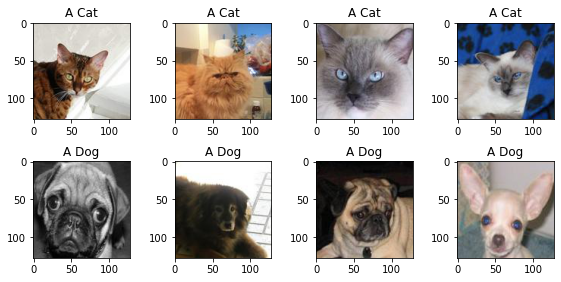

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

f, axs = plt.subplots(2, 4, figsize = (8, 4))
for i in range(4):
    img = np.random.choice(cats)
    ax = axs[0, i]
    ax.set_title("A Cat")
    ax.imshow(Image.open(img))
for i in range(4):
    img = np.random.choice(dogs)
    ax = axs[1, i]
    ax.set_title("A Dog")
    ax.imshow(Image.open(img))
plt.tight_layout()

## Getting started with pytorch

The following part provides a brief introduction to the fundamentals of `pytorch`.

### Why pytorch?

As most other popular deep learning frameworks, `pytorch` provides the following features:

- automatic differentiation,
- GPU support,
- flexible composition of neural network models,
- numerous pre-defined network components and optimization methods.

Pytorch strikes a good balance between flexibility, usability and performance, making it well suited for an introductory exercise as this one. There of course exist quite a few alternative frameworks, but the general concepts that you will learn in this exercise will apply also for them.

### Accessing documentation

Note that you can access source code documentation from inside the jupyter notebook using `?` and the `help` function. Documentation of the different torch modules can be found on the [pytorch home page](https://pytorch.org/docs/stable/index.html). 

In [3]:
import torch
help(torch.tensor)

Help on built-in function tensor in module torch:

tensor(...)
    tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
    
    Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.
    
    .. warning::
    
        When working with tensors prefer using :func:`torch.Tensor.clone`,
        :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
        readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
        ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
        is equivalent to ``t.clone().detach().requires_grad_(True)``.
    
    .. seealso::
    
        :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
        :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.
    
    Args:
        data (array_like): Initial data for the tensor. Can be a li

##### Tensors

Tensors are a fundamental concept of `pytorch`, as well as most other deep learning frameworks. A tensor  designates a collection of elements that are organized on a multi-dimensional grid. You may think of them as a generalization of vectors or matrices: The elements in a vector are organized along 1 dimension, whereas in a matrix they are organized along 2 dimensions.

A typical application of tensors is to hold images. As an example, we can load an image of a dog into a `torch.tensor`:

In [4]:
from torchvision.transforms.functional import to_tensor, to_pil_image
image_name = np.random.choice(dogs)
dog = to_tensor(Image.open(image_name))
print("The size of 'dog' is:", dog.size())
dog

The size of 'dog' is: torch.Size([3, 128, 128])


C:\Users\hsahn\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


tensor([[[0.4118, 0.2118, 0.0549,  ..., 0.2392, 0.2588, 0.2353],
         [0.3765, 0.1961, 0.0431,  ..., 0.2588, 0.2784, 0.2588],
         [0.3451, 0.2000, 0.0431,  ..., 0.2784, 0.2824, 0.2588],
         ...,
         [0.9137, 0.8431, 0.6902,  ..., 0.8431, 0.8510, 0.8627],
         [0.8588, 0.8000, 0.6549,  ..., 0.8118, 0.8000, 0.7882],
         [0.7451, 0.7059, 0.6706,  ..., 0.8392, 0.8039, 0.7725]],

        [[0.4196, 0.2157, 0.0549,  ..., 0.3922, 0.4118, 0.3882],
         [0.3843, 0.2000, 0.0431,  ..., 0.4118, 0.4314, 0.4118],
         [0.3529, 0.2039, 0.0431,  ..., 0.4431, 0.4471, 0.4235],
         ...,
         [0.8863, 0.8157, 0.6627,  ..., 0.8235, 0.8314, 0.8431],
         [0.8314, 0.7725, 0.6275,  ..., 0.7922, 0.7804, 0.7686],
         [0.7176, 0.6784, 0.6431,  ..., 0.8196, 0.7843, 0.7529]],

        [[0.3765, 0.1922, 0.0549,  ..., 0.2078, 0.2275, 0.2039],
         [0.3412, 0.1765, 0.0431,  ..., 0.2275, 0.2471, 0.2275],
         [0.3098, 0.1804, 0.0431,  ..., 0.2471, 0.2510, 0.

It becomes interesting when we start applying mathematical operations to tensors. For example we can compute the average of a cat and a dog. Note that all common mathematical operators (`+`, `-` `*`, `**`, ...) are defined on tensors.

Text(0.5, 1.0, 'A cat/dog average')

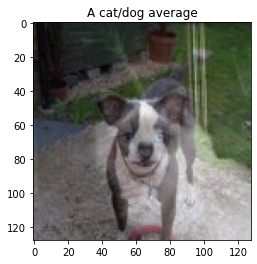

In [5]:
image_name = np.random.choice(cats)
cat = to_tensor(Image.open(image_name))
plt.imshow(to_pil_image(0.5 * (cat + dog)))
plt.title("A cat/dog average")

### Common tensor operations

There are many operations available on tensors and most of them follow the names used in `numpy`. In general, you can expect there to be an operation for most tasks at hand, so make sure you check the `pytorch` documentation search engine before you start cooking up something on your own.

#### Creation

In [6]:
import torch
ones = torch.ones(10, 10)
zeros = torch.zeros(10, 10)
rand = torch.randn(10, 10)
# print(rand)

#### Mathematical operations

In [7]:
rand1 = torch.add(ones, rand)
p = torch.sigmoid(rand)
exp = torch.exp(rand)

#### Conversion from and to numpy arrays

numpy arrays can be converted directly to pytorch tensors using the `torch.tensor` function.

Converting `pytorch` tensors to numpy arrays can be done using the `numpy()` member function. If `pytorch` tracks the gradient of a tensor, then you will also need to call the `detach()` member function.

In [8]:
t_numpy = np.random.rand(2, 2)
t = torch.tensor(t_numpy)
print("Type of t:", type(t_numpy))
print("Type of t_pytorch:", type(t))
print("Type of t_pytorch.numpy():", type(t.numpy()))

Type of t: <class 'numpy.ndarray'>
Type of t_pytorch: <class 'torch.Tensor'>
Type of t_pytorch.numpy(): <class 'numpy.ndarray'>


In [9]:
t.requires_grad = True
#t.numpy() # Doesn't work
t.detach().numpy() # Works

array([[0.61558124, 0.11324937],
       [0.29439035, 0.87191033]])

### Automatic differentiation

One of the core strengths of pytorch is that it let's you compute complex mathematical operations on tensors and compute their derivatives. Remember, that this is an important part of training neural networks: In order to minimize the loss function using gradient descent, it is of course required to first compute the gradients. Luckily, `pytorch`'s `autograd` module can take care of all the complicated calculations that are required to compute the gradients of neural networks.

Computing gradients w.r.t to a given tensor involves the following steps:
1. Create a tensor and set the `requires_grad` attribute to `True`,
2. apply mathematical operations,
3. call the `backward()` function of the result tensor to compute the gradients.

> *Note:* Step 1 is not required for parameters of networks, whose gradients are computed by default when the model is in training mode.

As an example, take the following operation:

In [10]:
x = torch.linspace(-4, 4, 101, requires_grad=True)
y = torch.sigmoid(x)
z = y.sum()
z.backward()
dzdx = x.grad

Text(0, 0.5, 'y')

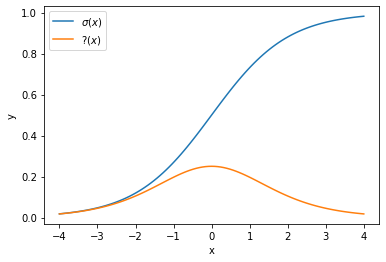

In [11]:
f, ax = plt.subplots(1, 1)
ax.plot(x.detach().numpy(),
        y.detach().numpy(),
        label = "$\sigma(x)$")
ax.plot(x.detach().numpy(),
        dzdx.numpy(),
        label = "$?(x)$")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

## Exercise 5: Derivatives of activation functions [0.5 points] 

Write down analytical expressions for the function $\sigma(x)$ and $?$ shown above.

#### 📝 Your answer here:

$\sigma(x) = \frac{1}{1 + e^{-x}}$


The ? function is the gradient of sigmoid function.

$?(x) = \frac{d (\sigma(x))}{dx} = \sigma(x)(1 - \sigma(x)) = \frac{1}{1 + e^{-x}} (1 - \frac{1}{1 + e^{-x}}) = \frac{1}{1 + e^{-x}} (\frac{1 + e^{-x} - 1}{1 + e^{-x}}) = \frac{ e^{-x} }{(1 + e^{-x})^2}$

### GPU acceleration

Training complex networks is a computationally demanding task. To shorten training times, calculations are typically performed on specialized hardware that was traditionally used to render 3D graphics on computers, so called graphic processing units (GPUs) or graphic cards. GPUs are in general more efficient in performing  highly-parallel computational tasks than CPUs, which are the chips that perform all 'standard' calculations in a PC. In `pytorch`, all oprations on tensors can be performed on a GPU using NVIDIA's CUDA computing platforms (https://en.wikipedia.org/wiki/CUDA).

The different processors that can be used for calculations, i.e. CPU or GPU, are represented in `pytorch` as devices. Each tensor has an associated device on which its data is located.
The default device is represented by `torch.device("cpu")`. Hence by default, all calculations are executed on the CPU.  In order to be able to perform calculations on a tensor using a GPU, you need to move its data to the GPU's memory.


> **Note:** If you are using Google Colab, you may need to enable GPU hardware acceleration by `Go to Menu > Runtime > Change runtime` and change hardware acceleration to GPU.

In [12]:
# First check if CUDA is available.
print(torch.cuda.is_available())
cuda = torch.device("cuda")
cpu = torch.device("cpu")

False


## Loading the data

To train a network on the `catsndogs` dataset, we need to load the images into tensors. The `catsndogs.training` module has an attribute `folder`, which points to the root folder containing the training data. The root folder contains a `cat` and a `dog` folder which holds the images of cats and dogs, respectively.


Using the `torchvision.datasets.ImageFolder` class, data that is organized in a folder structure like this can be turned directly into a dataset for training ML algorithms. The dataset provides access to the images as input and as an integer representations of the class labels as output.

In [13]:
from catsndogs.training import folder
from torchvision.datasets import ImageFolder

images = ImageFolder(folder)

You can load a sample from the training data by indexing the `images` object, which will return a tuple `(image, label)` containing the loaded image and corresponding label, which is 0 for cat and 1 for dog.

The type of image is: <class 'PIL.Image.Image'>
The label is: 0


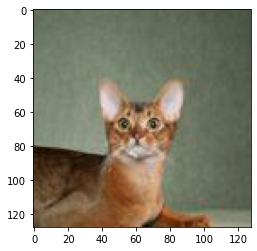

In [14]:
image, label = images[0]
# print(image.shape)
plt.imshow(image)
print("The type of image is:", type(image))
print("The label is:", label)

However, as the code above shows, the type of the loaded image is a `PIL` image and not a tensor. To automatically transform the loaded image into a tensor, you can make use of the `transformation` parameter of the `ImageFolder` class.

The cell below adds a composition of two transforms to the dataset. The two transforms are applied sequentially to the image object that would otherwise be returned from the dataset. The first transform turns the image into a torch tensor and the second transform normalizes the image values so that they lie in the range $[-1, 1]$.

> Note: Input data that is not centered around zero can cause convergence problems during training, so it is usually a good idea to normalize input data to a range centered around 0.

In [15]:
from torchvision.transforms import Compose, ToTensor, Normalize

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
images = ImageFolder(folder, transform=transform)
image, label = images[0]
print("Type of image is now:", type(image))

Type of image is now: <class 'torch.Tensor'>


In [16]:
# This function inverts the transformation of the input images.
def to_image(tensor):
    tensor = 0.5 * (tensor + 1.0)
    return to_pil_image(tensor)

For the training, we further split the data into training and validation set:

In [17]:
n_train = int(0.9 * len(images))
n_val = len(images) - n_train
training_data_catsndogs, validation_data_catsndogs = torch.utils.data.random_split(images, (n_train, n_val))

## Exercise 6: Training a fully-connected network [4 points]
### Defining a neural network model

Neural networks in `pytorch` are represented using the [`torch.nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class. The typical way to define a neural network model is to define a new class that inherits from the `Module` class.

### a) [1 point]

Inspect the code given below and, using the documentation of the [`torch.nn`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) module, answer the following questions:
- What is the architecture of instances of the `FullyConnected` class?
- What activations functions are applied in the hidden layers?
- What activation function is used for the output?
- How are the parameters of the network initialized? Why is this important to know?

In [18]:
from torch import nn

class FullyConnected(nn.Module):
    """
    Usually, this docstring should contain useful information about this
    class but this would make the exercise too easy.
    """
    def __init__(self,
                 input_features,
                 width):
        """
        Create a new mysterious network.
        """
        super().__init__()
        self.input_features = input_features
        self.fc_1 = nn.Linear(input_features, width)
        self.fc_2 = nn.Linear(width, width)
        self.fc_3 = nn.Linear(width, width)
        self.fc_4 = nn.Linear(width, 1)
        
    def forward(self, x):
        """
        The forward method required by nn.Module base class.
        """
        x = x.flatten(1, -1)
        x = self.fc_1(x)
        x = torch.relu(x)
        x = self.fc_2(x)
        x = torch.relu(x)
        x = self.fc_3(x)
        x = torch.relu(x)
        x = self.fc_4(x)
        return x
    

#### 📝 Your answer here:

The FullyConnected class consists of four hidden layers. Each layer is linear and has an input and output size of "width", except for the first layer, which has an input size of "input_feature" and the last layer, which has an output size of 1. A ReLU function is applied to each layer for non-linearity. The input tensor is flattened before it is passed to the layers.

The input layer has a size of "input_feature", which is the number of features in the image. The output layer has a single neuron that represents the model's prediction for the image.

The activation function for the hidden layers is a linear ReLU function, which is essentially a ReLU function with a linear component. The activation function for the output layer is just a linear function.


The parameters in the FullyConnected class are initialized based on the input size of each linear layer. This means that the parameters only depend on the number of input_features for the first layer and the size of "width" for the rest, which are hyperparameters that can be configured or increased with more samples.
It's important to understand how the parameters are initialized so that we can choose the appropriate types of layers for our model. For example, if we want our parameters to be positive numbers less than 1, we might end up with a linear network that can't capture the correct range if we choose a large "width" and have many input_parameters without knowing how the linear layers work. When the parameters of a CNN are randomly initialized, it can affect how quickly the network can converge to an optimal solution during training. If the weights are initialized to be too large or too small, the network may struggle to learn useful features and may fail to converge to a good solution. Initializing the weights properly can help prevent overfitting and improve the ability of the network to generalize to new data.

This is just one example of why knowing how the parameters are initialized is essential, as it can have a significant impact on the performance of the model. There may be situations where the parameters initialized to less than zero remain there permanently because there is no minimum in the negative space for our model.


### The training loop

In the cell below you find code for a typical training loop in `pytorch`. 

### b) [1 point]

Look at the function below and answer the following questions: 

- Most of the actual training functionality is abstracted away in the arguments provided to the function. For each of the arguments, describe what tasks the corresponding object has to perform so that this method can be used to train a neural network.
- What functions do the calls `model.train()` and `model.eval()` have? Why are these calls important?

In [19]:
def train_epoch(training_loader,
                validation_loader,
                model,
                loss,
                optimizer,
                device):
    """
    Again, this should be a useful docstring, but that would
    give away the answer for the exercise.
    """
    
    model.train()
    model.to(device)
    
    training_loss = 0.0
    n = len(training_loader)
    
    for i, (x, y) in enumerate(training_loader):
        
        # Set gradients to zero.
        optimizer.zero_grad()
        
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        l.backward()
        optimizer.step()
        
        training_loss += l.item()
        print("Batch ({} / {}): Loss {:.2f}".format(i, n, l.item()), end="\r")
        
    training_loss /= n
        
    model.eval()
    validation_loss = 0.0
    n = len(validation_loader)
    
    for i, (x, y) in enumerate(validation_loader):
        # Move input to device
        x = x.to(device)
        y = y.to(device)
        
        # Predict output, compute loss, perform optimizer step.
        y_pred = model(x)
        l = loss(y_pred, y.view(-1, 1).float())
        
        validation_loss += l.item()
    validation_loss /= n
    
    model.to(torch.device("cpu"))
    
    return (training_loss, validation_loss)

#### 📝 Your answer here:


**Training_loader**

Loader that holds the data used during the training step of the model.


**Validation_loader**

Loader that holds the data used to validate the results of the model after it has been trained. It is the part of the training set used for validation.

**Model**

The actual neural network model that has all the layers and their parameters. Used to compute results based on input such that a loss function can be computed and the networks parameters can be updated via backpropagation.
 
**Loss**

Object used to calculate the loss function based on the predicted values of the model and their actual labels. It is a value which describes how well the current parameters in the model are at predicting the desired output.

**Optimizer**

It is the object that calculates and improves parameters based on a loss function and its computed gradients. Its main task is to modify the parameters in a way that they perform better in the next iteration, and it also determines the appropriate optimization strategy for the parameters/variables. 


**Device**

This refers to an entity that decides on the allocation of tensors to a specific device, such as CUDA or CPU. This decision determines which component is responsible for tasks such as predicting values from the model, computing gradients, etc. The device allocation also affects the overall performance and running time of training and testing the model.


**Model train vs eval**

The train and eval calls are used to determine whether the model is in training or evaluation mode. This differentiation is important because certain functions used during training should not be used during evaluation. For instance, if dropout regularization is employed during training, setting the model in eval mode will prevent the network from dropping parameters while still being regularized in a similar way during training.

Therefore, it is crucial to ensure that the model is in the appropriate mode to use the correct functions in each step. Using dropout during evaluation but not during prediction, for instance, could produce strange and undesired outcomes.

## The optimizer object

In the code above the optimization method was hidden in the `optimizer` object. To understand how to write a suitable optimizer, you first need to understand a bit more about the role of `Module` objects in `pytorch`. The `torch.nn.Module` class is the base class for all neural networks and the components that make up neural networks. Module objects typically have trainable parameters. These trainable parameters of a module can be accessed via its `parameters()` member function. When a module contains attributes that are themselves `Module` instances, then  the `parameters()` function of the containing module will automatically list the trainable parameters of its `Module` attributes.

In order to  train a network, the optimizer needs to be aware of the module's parameters. In `pytorch` an optimizer object therefore always needs to be instantiated with a list of parameters that should be trained. In addition to that, an optimizer typically provides a function to set the gradients of the module parameters to zero. This is because gradients in pytorch are accumulated between consecutive calls to the `backward()` function.
This makes it necessary to set the gradients to zero between two training iterations.

Note here how the the `step` method of the `SGD` class performs gradient descent on the provided list of parameters.

> The `parameters()` member function returns a list of tensors representing the weight matrices and bias vectors in a network. Given a tensor `p`, you can access its gradients using the `p.grad` attribute.

> Because of the way `pytorch`'s autograd function works, changing the  value of a parameter `p` has to be done using its `p.data` attribute:

```
p.data = ...
```


In [20]:
class GradientDescent():
    """
    A gradient descent optimizer.
    """
    def __init__(self,
                 parameters,
                 learning_rate):
        """
        Create a gradient descent optimizer.
        
        Arguments:
            parameters: Iterable providing the parameters to optimize.
            learning_rate: The learning rate to use for optimization.
        """
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def zero_grad(self):
        for p in self.parameters:
            if not p.grad is None:
                p.grad.zero_()
        
    def step(self):
        """
        Perform a gradient descent step on parameters associated to this optimizer.
        """
        for p in self.parameters:
            p.data.add_(p.grad, alpha=-self.learning_rate)

## Training the network

With the optimizer, the model and the training loop in place we are close to being able to start training the network, however a few details remain to be sorted out.

The `training_data_catsndogs` and `validation_data_catsndogs` object defined above can be used to iterate over the data, but only on a per sample basis. For the training of a neural network, however, we typically want to iterate through the data in batches. To take care of this, `pytorch` provides the `DataLoader` class, which can be used to batch and shuffle existing data:

In [21]:
from  torch.utils.data import DataLoader
training_loader_catsndogs = DataLoader(training_data_catsndogs, batch_size=32, shuffle=True)
validation_loader_catsndogs = DataLoader(validation_data_catsndogs, batch_size=32, shuffle=True)

Next, we need to choose a suitable training loss to minimize. We will use the Binary Cross Entropy with logits loss that combines a Sigmoid layer and the BCELoss in one single class. 

You can find and read more about other loss functions under [`torch.nn`](https://pytorch.org/docs/stable/nn.html).

> Note that the loss function is applied **directly** to the output of the network in the `train_epoch` function defined above. That is why we use a loss that also includes a sigmoid function. If we take the output as-is, it has the potential to be any real-valued number. By applying the sigmoid function, we bound the output to values between [0,1], which better corresponds to a predicted probability of cat (0) vs. dog (1).

In [22]:
loss = torch.nn.BCEWithLogitsLoss()

Finally, we choose the device to run the training on. If available, you should use a GPU because it will be substantially faster.


In [23]:
if torch.cuda.is_available():
    device = torch.device('cuda') # Default CUDA device
else:
    device = torch.device('cpu')

### c) [1 point]

Train the neural network for at least 10 epochs, then reduce the learning rate and continue training for at least another 10 epochs. Plot the resulting training and validation losses, and answer the following question(s):

- Was the training successful? Explain why.  
- If the training was unsuccessful, give suggestion(s) on what can be done to make the training successful over the same number of epochs.


#### 📝 Your answer here:

In our opinion, we cannot say that the training was really successful because there is not a significant drop in the loss. We have a slight drop in the loss for both the training set and the validation set which can be seen from the graph plotted below. Now in our case the model perofrms poorly on the training set itself, which means there is a problem of underfitting. Underfitting occurs when the model is unable to accurately model the training data, and hence generates large errors.
Having a loss in the range of 0.6 is not good, there is a lot of scope of improvement in this by changing the network, for example, using a convolution neural network for classification.
To improve the training we can :
1. Change the loss function, trying different loss functions will help get better insights.
2. Experimenting with different learning rates is also a good option which can lead to better results.

In [24]:
num_epochs = 10

fc_model = FullyConnected(49152, 64)
optimizer = GradientDescent(fc_model.parameters(), 0.001)

training_loss = []
validation_loss = []

for i in range(num_epochs):
    (initial_training_loss, initial_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  fc_model,
                  loss,
                  optimizer,
                  device)
  
    training_loss.append(initial_training_loss)
    validation_loss.append(initial_validation_loss)

new_optimizer = GradientDescent(fc_model.parameters(), 0.0001)

for i in range(num_epochs):

    (updated_training_loss, updated_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  fc_model,
                  loss,
                  new_optimizer,
                  device)
  
    training_loss.append(updated_training_loss)
    validation_loss.append(updated_validation_loss)  


Text(0.5, 0, 'Epoch')

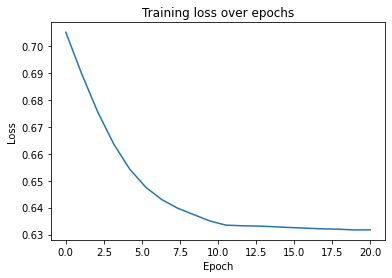

In [25]:
x = np.linspace(0, 20, 20)
plt.plot(x, training_loss)
plt.title("Training loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

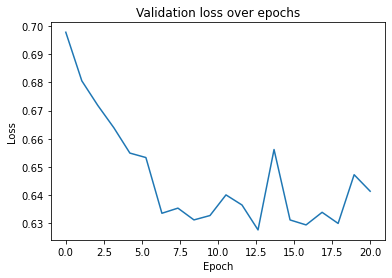

In [26]:
plt.plot(x, validation_loss)
plt.title("Validation loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

### d) [0.5 point]

A useful performance metric for binary classification tasks  is the [receiver operating characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic). Complete the code below and write a function that computes the true positive and false positive rate for varying values of the discrimination threshold $p \in [0, 1]$. Then, using the code below, plot the ROC curve. What is the significance of the black, dashed line?

#### 📝 Your answer here:

In [27]:
def receiver_operating_characteristic(model,
                                      validation_loader,
                                      ps):
    """
    Computes receiver operating characteristic for given model and
    validation data.
    
    Arguments:
        model: The pytorch model to evaluate.
        validation_loader: torch DataLoader to use to iterate over validation data.
        ps: Iterable containing the values of the discrimination threshold in
           increasing order.
    Returns:
        (fpr, tpr): Tuple containing the false positive rates (fpr) and the true
            positive rates as numpy.ndarrays.
    """
    
    tpr = np.array([])
    fpr = np.array([])

    n = len(validation_loader)
    
#     print(n)
#     print(ps)
    for i in ps:
    
        true_positive = 0
        false_positive = 0
        true_negative = 0
        false_negative = 0

        for j, (x, y) in enumerate(validation_loader):
            y_pred = model(x)
#             print(y_pred)

            for k in range(len(y)):
#                 print('i', i)
#                 print('y_pred', y_pred[k])
                threshold = y_pred[k].detach().numpy()[0] > i
#                 print("--------------")
#                 print('threshold', threshold)
                
                if (threshold and y[k] == 1):
                    true_positive += 1
                elif (threshold and y[k] == 0):
                    false_positive += 1
                elif (not threshold and y[k] == 1):
                    false_negative += 1
                else:
                    true_negative += 1



        tpr = np.append(tpr, true_positive/(true_positive + false_negative))  # Recall = TP/(TP+FN)
        fpr = np.append(fpr, false_positive/(false_positive + true_negative))  
      

    return (fpr, tpr)
        

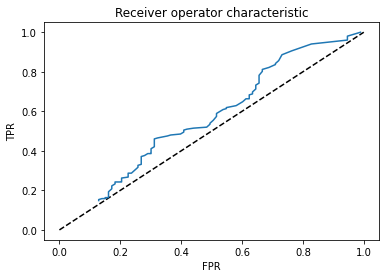

In [28]:
fpr, tpr = receiver_operating_characteristic(fc_model, validation_loader_catsndogs, np.linspace(0, 1, 101))

def plot_ROC(fpr,tpr):
    """
    Plots ROC curve

    Arguments:
        fpr: array-like containing false positive rates
        tpr: array-like containing true positive rates

    """
    x = np.linspace(0, 1, 101)
    f, ax = plt.subplots(1, 1)
    ax.plot(x, x, c="k", ls="--")
    ax.plot(fpr, tpr)
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title("Receiver operator characteristic")

plot_ROC(fpr,tpr)

The y axis is the true positive rate or also refeared as sensitivity of the model. the x axis is the false positive rate, which is the same thing as 1 - specificity. The black diagonal line shows when TPR = FPR.

Any point in this line means that the proportion of correctly classified samples is the same as the proportion of incorrectly classified samples. When a point is above, the dashed black line, it means the proportion of correctly classified samples is greater than the proportion of incorrectly classified samples.

### e) [0.5 point]

One way to summarize the receiver operator characteristic (ROC) is to compute the area under the curve. This can be done using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Complete the code below and write a function for computing the area under the receiver operator characteristic curve (AUC ROC) using the trapezoidal rule. Then, calculate the area under the ROC-curve in exercise above (e) using this function.

Note: You are not allowed to use any built-in trapeziodal function (e.g. the one from NumPy). You are to make your own implementation.


#### 📝 Your answer here:

In [29]:
def auc_roc(fpr, tpr):
    """
    Computes area under receiver operating characteristic curve using the
    trapeziodal rule for given false positive and true positive rates.
    
    Arguments:
        fpr: False positive rates.
        tpr: True positive rates.
        
    Returns:
        auc_roc: Area under the receiver operating characteristic curve as
            float value
    """
    x = fpr[::-1]
    y = tpr[::-1]
    n = len(x) - 1
    
    area = 0
    for i in range(n):
        trapezoidal = 1/2 * (y[i + 1] + y[i]) * (x[i + 1] - x[i])
        area += trapezoidal
    return area

Finally, let's look at the prediction for samples from the validation set. Is this what you expected? You do **not** need to write down an answer for this question, but you should always spend some time to reflect on your results.

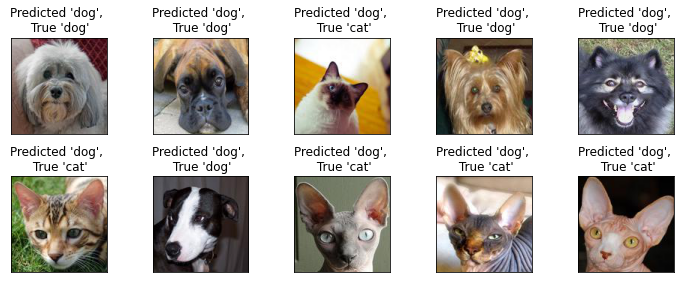

In [30]:
def index_to_pet(index):
    
    if index == 0:
        return "cat"
    else:
        return "dog"
    
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
        
plot_results(fc_model, validation_data_catsndogs)

## Exercise 7: Training a convolutional neural network [3 points]

### a) [1 point]

Define and train a convolutional network with the following architecture:
- 2D conv. layer: $8$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $4 \times 4$, stride 4
- 2D conv. layer: $4$ filters, kernel size $5 \times 5$, stride 1
- ReLU activation function
- Max pooling: kernel size $3 \times 3$, stride 3
- Fully connected layer: 1 neuron
    

> **Hint:** You can find all necessary components to implement the convolutional network in the [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module.

#### 📝 Your answer here:

In [31]:
import torch.nn.functional as F
import torchvision.transforms as transforms


# print(image.shape)
# conv1 = nn.Conv2d(3, 8, 5)
# x = conv1(image)
# print(x.shape)
# pool1 = nn.MaxPool2d(4, 4)
# x = pool1(x)
# print(x.shape)
# conv2 = nn.Conv2d(8, 4, 5)
# x = conv2(x)
# print(x.shape)
# pool2 = nn.MaxPool2d(3, 3)
# x = pool2(x)
# print(x.shape)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool1 = nn.MaxPool2d(4, 4)
        self.conv2 = nn.Conv2d(8, 4, 5)
        self.pool2 = nn.MaxPool2d(3, 3)
        self.fc1 = nn.Linear(324, 1)

        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 324)
        x = torch.sigmoid(self.fc1(x))
        return x


In [32]:
num_epochs = 10

conv_model = ConvNet()
conv_optimizer = GradientDescent(conv_model.parameters(), 0.01)
conv_loss = nn.BCELoss()


conv_train_Loss = []
conv_val_loss = []

for i in range(num_epochs):
    

    (initial_training_loss, initial_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  conv_model,
                  conv_loss,
                  conv_optimizer,
                  device)
    conv_train_Loss.append(initial_training_loss)
    conv_val_loss.append(initial_validation_loss)


new_conv_optimizer = GradientDescent(conv_model.parameters(), 0.001)


for i in range(num_epochs):
    
    (updated_training_loss, updated_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  conv_model,
                  conv_loss,
                  new_conv_optimizer,
                  device)
    conv_train_Loss.append(updated_training_loss)
    conv_val_loss.append(updated_validation_loss)

Text(0.5, 0, 'Epoch')

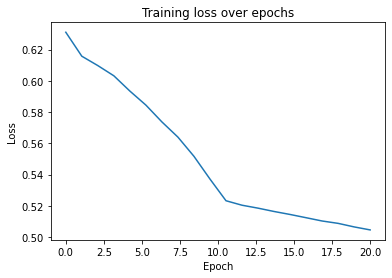

In [33]:
x = np.linspace(0, 20, 20)
plt.plot(x, conv_train_Loss)
plt.title("Training loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

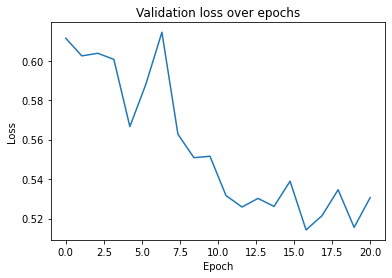

In [34]:
plt.plot(x, conv_val_loss)
plt.title("Validation loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

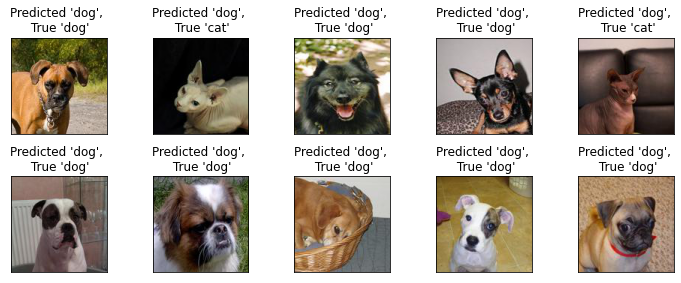

In [35]:
plot_results(conv_model, validation_data_catsndogs)

### b)  [2 points]

Tune the network architecture and training routine to achieve a validation loss lower than 0.3. Try to do at least 2 improvements. Some things you may want to try: 
- Alter the complexity of your network (number of layers, filters or neurons)
- A learning rate schedule
- Checkpoints or early stopping
- Data augmentation to increase the number of training points
- Dropout
- Other regularization techniques


#### 📝 Your answer here:

In [36]:
import torch.nn.functional as F
import torchvision.transforms as transforms

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool1 = nn.MaxPool2d(4, 4)
        self.conv2 = nn.Conv2d(8, 4, 5)
        self.pool2 = nn.MaxPool2d(3, 3)
#         self.fc1 = nn.Linear(324, 64)
#         self.fc2 = nn.Linear(64, 1)
        self.fc1 = nn.Linear(324, 1)
        
        self.flipH = transforms.RandomHorizontalFlip(p=0.5)
        self.dropout = nn.Dropout()
        self.batchNorm1 = nn.BatchNorm2d(8)
        self.batchNorm2 = nn.BatchNorm2d(4)
        
    def forward(self, x):
        
        x = self.flipH(x)
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.batchNorm1(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.batchNorm2(x)
        x = x.view(-1, 324)
#         x = x.flatten(1, -1)
#         x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc1(x))
        return x


In [37]:
num_epochs = 10

conv_model = ConvNet()
conv_optimizer = GradientDescent(conv_model.parameters(), 0.01)
conv_loss = nn.BCELoss()


conv_train_Loss = []
conv_val_loss = []

for i in range(num_epochs):
    

    (initial_training_loss, initial_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  conv_model,
                  conv_loss,
                  conv_optimizer,
                  device)
    conv_train_Loss.append(initial_training_loss)
    conv_val_loss.append(initial_validation_loss)


new_conv_optimizer = GradientDescent(conv_model.parameters(), 0.001)


for i in range(num_epochs):
    
    (updated_training_loss, updated_validation_loss) = train_epoch(training_loader_catsndogs,
                  validation_loader_catsndogs,
                  conv_model,
                  conv_loss,
                  new_conv_optimizer,
                  device)
    conv_train_Loss.append(updated_training_loss)
    conv_val_loss.append(updated_validation_loss)

Text(0.5, 0, 'Epoch')

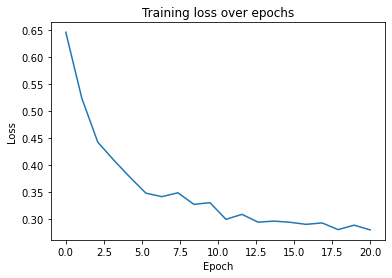

In [38]:
x = np.linspace(0, 20, 20)
plt.plot(x, conv_train_Loss)
plt.title("Training loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

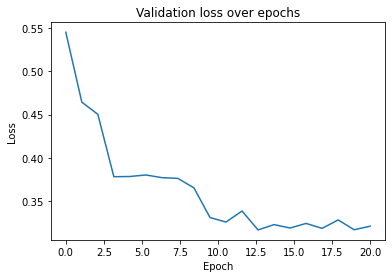

In [39]:
plt.plot(x, conv_val_loss)
plt.title("Validation loss over epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")

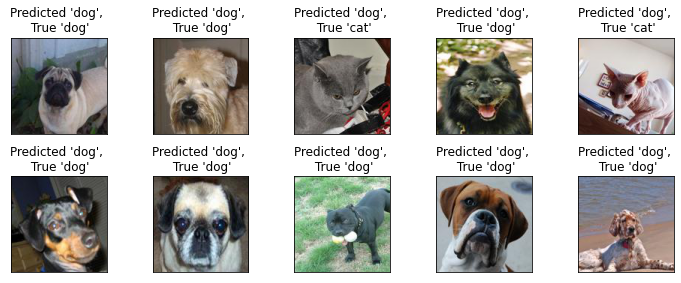

In [40]:
plot_results(conv_model, validation_data_catsndogs)

## Exercise 8: Evaluation on test set [1 point]

Now evaluate the performance of the fully-connected neural network to your best convolutional neural network on the `catsndogs` test data, which is available in `catsndogs.test` module.

- Plot ROC curves and compute AUC ROC for both the fully-connected and the convolutional model.
- Compute the accuracy of each model for a discimination threshold p = 0.5
- Provide a plot, for each model, of 8 images from the test set together with the prediction from the model.

#### 📝 Your answer here:

In [41]:
from catsndogs.test import folder

images_test = ImageFolder(folder)

transform = Compose([ToTensor(),
                     Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
test_data_catsndogs = ImageFolder(folder, transform=transform)
test_dataloader_catsndogs = DataLoader(test_data_catsndogs, batch_size=32, shuffle=True)


In [42]:
fpr, tpr = receiver_operating_characteristic(fc_model, test_dataloader_catsndogs, np.linspace(0, 1, 101))
fpr_conv, tpr_conv = receiver_operating_characteristic(conv_model, test_dataloader_catsndogs, np.linspace(0, 1, 101))

AUC ROC for fully-connected model:  0.5416150627615061


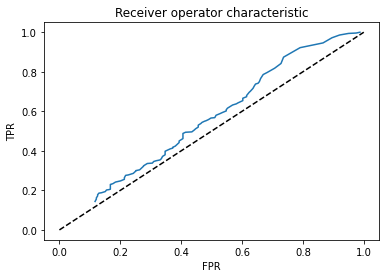

In [43]:
plot_ROC(fpr, tpr)
print("AUC ROC for fully-connected model: ", auc_roc(fpr, tpr))

AUC ROC for CNN model:  0.9415355648535566


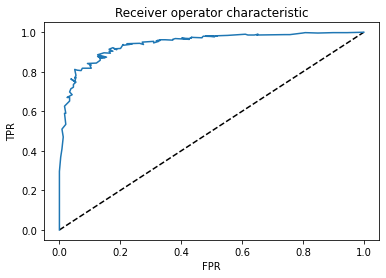

In [44]:
plot_ROC(fpr_conv, tpr_conv)
print("AUC ROC for CNN model: ", auc_roc(fpr_conv, tpr_conv))

In [45]:
def accuracy(model, validation_loader):
    tp, tn, fp, fn = 0, 0, 0, 0

    for x, y in validation_loader:
        y_pred = (torch.sigmoid(model(x)) >= 0.5).int()

        tp += ((y == 1) & (y_pred == 1)).sum().item()
        tn += ((y == 0) & (y_pred == 0)).sum().item()
        fp += ((y == 0) & (y_pred == 1)).sum().item()
        fn += ((y == 1) & (y_pred == 0)).sum().item()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy

accuracy_CNN = accuracy(conv_model, test_dataloader_catsndogs)
accuracy_FC = accuracy(fc_model, test_dataloader_catsndogs)

print('Accuracy for the Convolutional Network is:', accuracy_CNN)
print('Accuracy for the Fully Connected Network is:', accuracy_FC)


Accuracy for the Convolutional Network is: 0.6753957811637876
Accuracy for the Fully Connected Network is: 0.6753533381435423


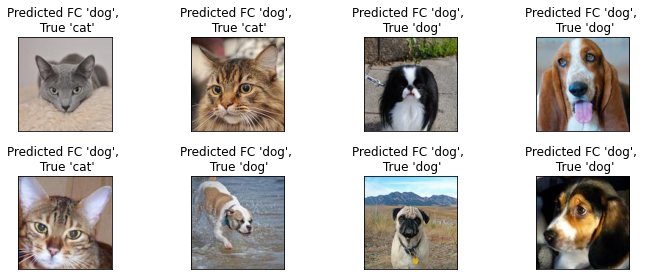

In [46]:
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 4, figsize=(10, 4))
    for i in range(8):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted FC '{}', \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

plot_results(fc_model, test_data_catsndogs)

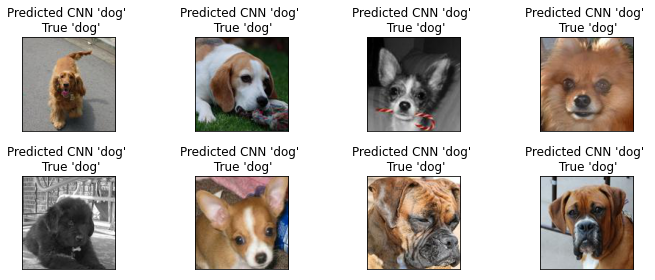

In [47]:
def plot_results(model, validation_data):
    model.to(torch.device("cpu"))
    f, axs = plt.subplots(2, 4, figsize=(10, 4))
    for i in range(8):

        # Make prediction on random validation sample
        index = np.random.randint(len(validation_data))
        x, y = validation_data[index]
        c = torch.sigmoid(model(x.unsqueeze(0))) >= 0.5
        x = 0.5 * (x + 1.0)
        
        ax = axs.ravel()[i]
        ax.imshow(to_pil_image(x))
        title = "Predicted CNN '{}' \n True '{}'"
        title = title.format(index_to_pet(c), index_to_pet(y))
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()

plot_results(conv_model, test_data_catsndogs)

___

## Clustering

We will also consider different clustering approaches to the catsndogs dataset. Two very performant deep learning models for image classification are [CLIP](https://openai.com/blog/clip/) and [Faster R-CNN](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html#torchvision.models.detection.fasterrcnn_resnet50_fpn). One potential explanation for the success of these networks is that they are good at forming internal _latent representations_ of the input images they receive which allows them to perform successful classification. We will take a closer look at the representations of these models and perform some clustering on the representations.

### Load representations

The generated representations and predicitons of these models for the training split of the `catsndogs` data are readibly available for download.

In [48]:
from torchvision.datasets import ImageFolder
from catsndogs.training import folder
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

images = ImageFolder(folder)
clip_preds = np.load("clip_preds.npy")
clip_reps = np.load("clip_representations.npy")
frcnn_preds = np.load("frcnn_preds.npy")
frcnn_reps = np.load("frcnn_reps.npy")

### Model performance 
We can start by confirming that these models perform very well on the catsndogs classification task despite not having been fine-tuned. CLIP makes an incorrect prediction on only four out of 2947 samples.

In [49]:
true_y = np.array([val[1] for val in images])
clip_score = np.sum(clip_preds==true_y)
print(f"CLIP # of correct predictions: {clip_score} out of {len(true_y)}")
frcnn_score = np.sum(frcnn_preds==true_y)
print(f"FRCNN # of correct predictions: {frcnn_score} out of {len(true_y)}")

CLIP # of correct predictions: 2943 out of 2947
FRCNN # of correct predictions: 2715 out of 2947


### Dimensionality reduction

The size of the image representations for CLIP and Faster R-Cnn is 512 and 64 respectively. To allow for easier visual inspection, we will perform clustering in only two dimensions and thus need to employ dimensionality reduction. We will make use of Principal Component Analysis (PCA) for this.

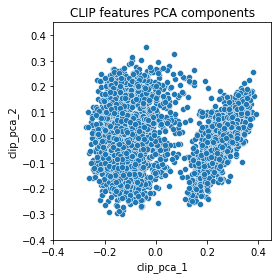

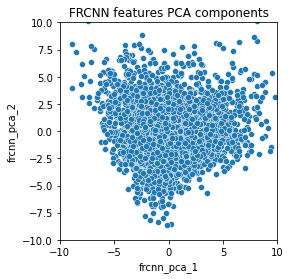

In [50]:
clip_pca = PCA(n_components=2, svd_solver='full')
clip_pca_feats = clip_pca.fit_transform(clip_reps)

frcnn_pca = PCA(n_components=2, svd_solver='full')
frcnn_pca_feats = frcnn_pca.fit_transform(frcnn_reps)

cluster_data = pd.DataFrame({"true_y": true_y, 
                             "clip_preds": clip_preds, 
                             "frcnn_preds": frcnn_preds.astype(np.int32),
                             "clip_pca_1": clip_pca_feats[:,0],
                             "clip_pca_2": clip_pca_feats[:,1],
                             "frcnn_pca_1": frcnn_pca_feats[:,0],
                             "frcnn_pca_2": frcnn_pca_feats[:,1]}
)

sns.scatterplot(
    data=cluster_data, x="clip_pca_1", y="clip_pca_2"
)
plt.title("CLIP features PCA components")
plt.xlim([-0.4,0.45])
plt.ylim([-0.4,0.45])
plt.gca().set_aspect('equal')
plt.show()

sns.scatterplot(
    data=cluster_data, x="frcnn_pca_1", y="frcnn_pca_2"
)
plt.title("FRCNN features PCA components")
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.gca().set_aspect('equal')
plt.show()

### Density plots
Many data points overlap to form densities. Thus, it might be suitable to consider the density plots of the data to get a better grasp of its underlying distribution.

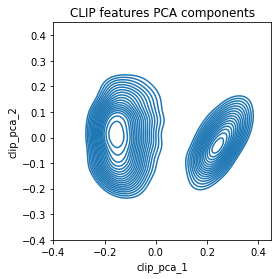

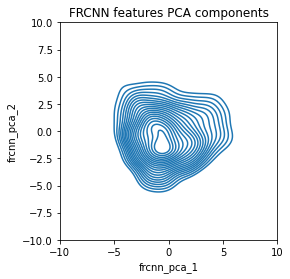

In [51]:
sns.kdeplot(
    data=cluster_data, x="clip_pca_1", y="clip_pca_2",
    levels=20, thresh=.2,
)
plt.axis
plt.title("CLIP features PCA components")
plt.xlim([-0.4,0.45])
plt.ylim([-0.4,0.45])
plt.gca().set_aspect('equal')
plt.show()

sns.kdeplot(
    data=cluster_data, x="frcnn_pca_1", y="frcnn_pca_2",
    levels=20, thresh=.2,
)
plt.title("FRCNN features PCA components")
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.gca().set_aspect('equal')
plt.show()

## Exercise 9: Choose clustering approach [1 point]

We will now start to perform the clustering. Based on the plots for the CLIP and FRCNN representations above, what clustering approach out of K-Means or EM with GMM would you use to try to cluster each of this data? Motivate your answer.

#### 📝 Your answer here:

For the CLIP model k-means is a suitable method since we can observe that the clusters are well separeted, meaning that k-means can quickly match the labels to the correspondant clusters. 

However, this is not the case for the FRCNN model, where we can observe an overlap in some of the data points, this will make k-means have a poor performance and one way to evaluate the label with more accuracy would be having a probabilistic assesment which GMM can offer. For this reason GMM would be more suitable for the FRCNN representation since it should work well with the overlaping section of the data.

## Exercise 10: Implement K means [2 points]

Regardless of your answer above, we will start by implementing K-means. 

* Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. 
* Use random points sampled uniformly without replacement from the data as initialization for the centroids. 
* Terminate the iterative procedure when the cluster assignments do not change. 
* Note that you do not need to make use of the data yet at this step (unless you want to do some testing).

#### 📝 Your answer here:

In [52]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from numpy.random import uniform

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KM_Model:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        #random point sample from the data as initialization for the centroid.
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        self.iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and self.iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            self.iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

## Exercise 11: Run your K means implementation [1 point]

In this exercise you will run your $k$-means algorithm implementation on the CLIP and FRCNN features respectively. You should run the algorithm on the `pca_1` and `pca_2` features. For each of the CLIP and FRCNN features:

1. What value of $k$ do you think is suitable for this data?

2. Run your k-means implementation on the data with your choice of suitable $k$. Run the algorithm 3 times on the data and plot the resulting cluster assignments for each run. Also note for each run how many iterations were required before convergence. 

3. Do you always get the same final cluster solutions and same number of required iterations? Why/why not?

#### 📝 Your answer here:


**1. What value of $k$ do you think is suitable for this data?**

As it is showned in the code below, we implemented the elbow method to obtained an optimal value for K. Which in this case it was k = 3.

**2. Run your k-means implementation on the data with your choice of suitable $k$. Run the algorithm 3 times on the data and plot the resulting cluster assignments for each run. Also note for each run how many iterations were required before convergence.** 

**3. Do you always get the same final cluster solutions and same number of required iterations? Why/why not?**


For both models (CLIP and FRCNN) We do get the same final cluster in the final solution, but in CLIP model the number of iterations tend to decrease, whilw with FRCNN the iterations required for convergance tends to stay the same. This could be due to the separation between clusters, in CLIP model we see two very define main clusters while in FRCNN the data points are bery close.


In [53]:
# standarize values of the data
x_clip = cluster_data.drop(['true_y', 'clip_preds', 'frcnn_preds', 'frcnn_pca_1', 'frcnn_pca_2'], axis = 1)
y_clip = cluster_data.true_y

# We separate into training and testing data
x_clip_train , x_clip_test , y_clip_train , y_clip_test  = train_test_split(x_clip , y_clip , test_size=0.3, random_state=1)

# preprocessing we are looking to standarize the features
x_clip_train = preprocessing.StandardScaler().fit_transform(x_clip_train)
x_clip_test = preprocessing.StandardScaler().fit_transform(x_clip_test)

In [54]:
#Elblow method to find the optimal value of k 
from sklearn.cluster import KMeans
center = []
for num_clusters in range(1,11):
    kmeanModel = KMeans(n_clusters=num_clusters)
    kmeanModel.fit(x_clip_train)
    center.append([num_clusters,kmeanModel.inertia_])
center = pd.DataFrame(center, columns=["number_of_clusters","distance"])

C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'K-Means Elbow Method')

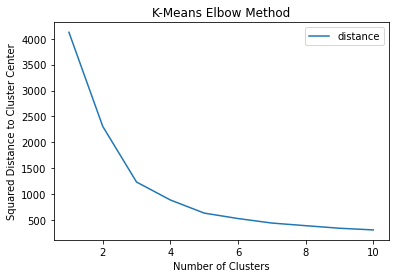

In [55]:
# plot the elbow method
center.set_index("number_of_clusters").plot()
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Distance to Cluster Center")
plt.title("K-Means Elbow Method")#### For CLIP

# For CLIP

In [56]:
clusters       = 3
num_repetition = 3
kmean_clip     = KM_Model(clusters)

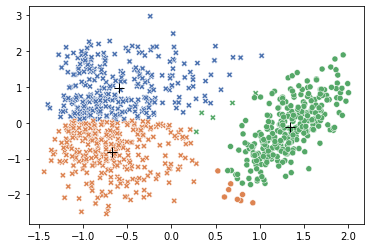

Run: 1 needed number of iterations: 16


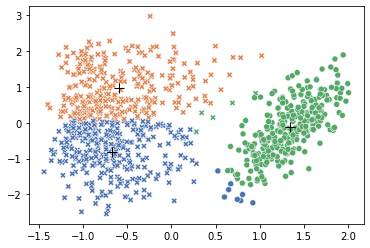

Run: 2 needed number of iterations: 14


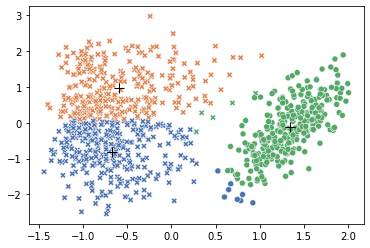

Run: 3 needed number of iterations: 6


In [57]:
for i in range(num_repetition):
    kmean_clip.fit(x_clip_train)
    # View results
    class_centers, classification = kmean_clip.evaluate(x_clip_test)
    sns.scatterplot(x=[X[0] for X in x_clip_test],
                    y=[X[1] for X in x_clip_test],
                    hue=classification,
                    style=y_clip_test,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in kmean_clip.centroids],
             [y for _, y in kmean_clip.centroids],
             'k+',
             markersize=10,
             )
    plt.show()
    print(f'Run: {i+1} needed number of iterations: {kmean_clip.iteration}')

# For FRCNN

In [58]:
# standarize values of the data
x_frcnn = cluster_data.drop(['true_y', 'clip_preds', 'frcnn_preds', 'clip_pca_1', 'clip_pca_2'], axis = 1)
y_frcnn = cluster_data.true_y

# We separate into training and testing data
x_frcnn_train , x_frcnn_test , y_frcnn_train , y_frcnn_test  = train_test_split(x_frcnn , y_frcnn , test_size=0.3, random_state=1)

# preprocessing we are looking to standarize the features
x_frcnn_train = preprocessing.StandardScaler().fit_transform(x_frcnn_train)
x_frcnn_test = preprocessing.StandardScaler().fit_transform(x_frcnn_test)

clusters   = 3
num_repetition = 3
kmean_frcnn = KM_Model(clusters)

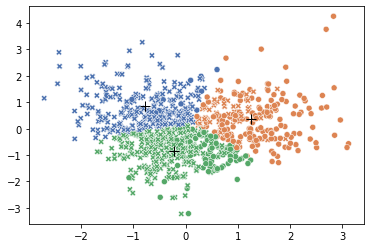

Run: 1 needed number of iterations: 6


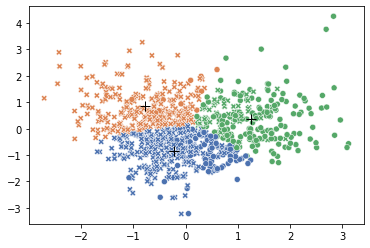

Run: 2 needed number of iterations: 6


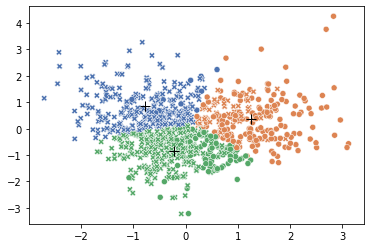

Run: 3 needed number of iterations: 6


In [59]:
for i in range(num_repetition):
    kmean_frcnn.fit(x_frcnn_train)
    # View results
    class_centers, classification = kmean_frcnn.evaluate(x_frcnn_test)
    sns.scatterplot(x=[X[0] for X in x_frcnn_test],
                    y=[X[1] for X in x_frcnn_test],
                    hue=classification,
                    style=y_frcnn_test,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in kmean_frcnn.centroids],
             [y for _, y in kmean_frcnn.centroids],
             'k+',
             markersize=10,
             )
    plt.show()
    print(f'Run: {i+1} needed number of iterations: {kmean_clip.iteration}')

## Exercise 12: Implement the intra-cluster variance metric [1 point]

* We will now estimate a good value for the number of clusters $k$ for the CLIP data using the intra-cluster variance $W=\sum_k W_k$, where $W_k = \frac{1}{|C_k|} \sum_{x\in C_k}(x-\mu_k)^2$.
* Plot the intra-cluster variance of your clustering solutions for $k \in [1,...,6]$ for the CLIP data.
* What $k$ seems to be most suitable, based on the intra-cluster variance plot?

#### 📝 Your answer here:

In [60]:
#Intra-cluster variance metric to find the optimal value of k 
from sklearn.cluster import KMeans
center_intra = []
for num_clusters in range(1,7):
    kmeanModel = KMeans(n_clusters=num_clusters)
    kmeanModel.fit(x_clip_train)
    intra_variance = kmeanModel.inertia_ / num_clusters
    center_intra.append([num_clusters,intra_variance])
center_intra = pd.DataFrame(center_intra, columns=["number_of_clusters","intra_variance"])

C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hsahn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Intra-cluster variance metric to find optimal k')

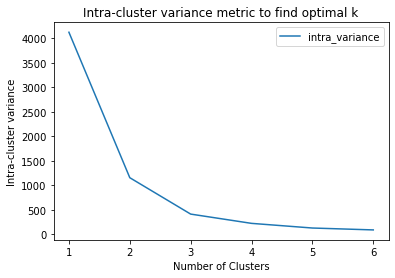

In [61]:
# Intra-cluster variance metric
center_intra.set_index("number_of_clusters").plot()
plt.xlabel("Number of Clusters")
plt.ylabel("Intra-cluster variance")
plt.title("Intra-cluster variance metric to find optimal k")

## Exercise 13: Plot a GMM [0.5 points]

We will now consider a mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

Plot the probability distribution $p(x)$ for the following parameter values.

$D = 1$,

$K = 2$,

$\pi_1 = \pi_2 = 0.5$,

$\mu_1 = -2$,

$\mu_2 = 5$, 

$\Sigma_1 = 3$,

$\Sigma_2 = 5$. 

#### 📝 Your answer here:

Text(0, 0.5, 'Probability Density')

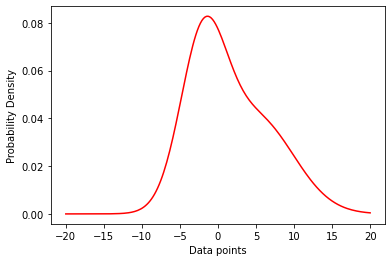

In [62]:
# Creating a series of data of in range of 1-50.
x = np.linspace(-20,20,200)
from scipy import stats

mixing_coeff = 0.5
miu_1 = -2
miu_2 = 5
sig_1 = 3
sig_2 = 5

#Apply function to the data.
prob_dist = mixing_coeff*stats.norm(miu_1,sig_1).pdf(x) + mixing_coeff*stats.norm(miu_2,sig_2).pdf(x)
 
#Plotting the Results
plt.plot(x,prob_dist , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

## Exercise 14: Fit a GMM with the EM algorithm [1 point]

We will not implement our own GMM or EM algorithm for this task, but use an already existing implementation from scikit-learn. Fit a Gaussian Mixture model from scikit-learn to each of the CLIP and FRCNN features and plot the resulting clusters. You can find the documentation for the function [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

#### 📝 Your answer here:

In [63]:
from sklearn.mixture import GaussianMixture

class GMM_Classifier():
    def __init__(self,components):
        self.components = components
    def fit(self,x_train):
        self.x_train = x_train
        self.gmmModel = GaussianMixture(n_components=self.components, random_state=0)
        self.gmmModel.fit(x_train)
        return self
    def predict(self,x_test):
        y_pred = self.gmmModel.predict(x_test)
        return y_pred

# For CLIP

In [64]:
components = 2
clip_features = np.array(cluster_data[['clip_pca_1','clip_pca_2']])
gmm_clip = GMM_Classifier(components)
gmm_clip.fit(clip_features)

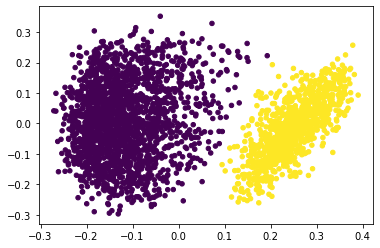

In [65]:
# View results
y_clip_predict = gmm_clip.predict(clip_features)
plt.scatter(x=[X[0] for X in clip_features], y=[X[1] for X in clip_features], c=y_clip_predict, s=20);

# for FRCNN

In [66]:
components = 2
frcnn_features =np.array(cluster_data[['frcnn_pca_1','frcnn_pca_2']])
gmm_frcnn = GMM_Classifier(components)
gmm_frcnn.fit(frcnn_features)

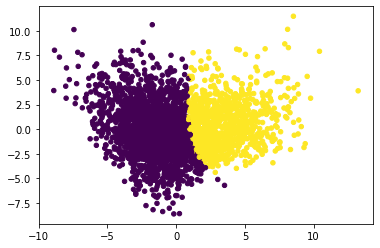

In [67]:
# View results
y_frcnn_predict = gmm_frcnn.predict(frcnn_features)
plt.scatter([X[0] for X in frcnn_features], [X[1] for X in frcnn_features], c=y_frcnn_predict, s=20);

## Final note 

We can use the true y labels of the catsndogs data to get one "correct" clustering of the data points. As can be seen below.

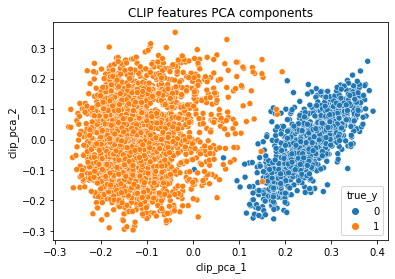

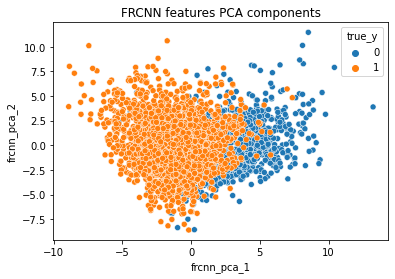

In [68]:
sns.scatterplot(
    data=cluster_data, x="clip_pca_1", y="clip_pca_2", hue="true_y",
)
plt.title("CLIP features PCA components")
plt.show()
sns.scatterplot(
    data=cluster_data, x="frcnn_pca_1", y="frcnn_pca_2", hue="true_y"
)
plt.title("FRCNN features PCA components")
plt.show()